<a href="https://colab.research.google.com/github/BrunoCapron/EQE358-metodos_numericos/blob/main/Capitulo_7_Res_EDOs/Notebooks_C%C3%B3digos/Algoritmos_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/BrunoCapron/EQE358-metodos_numericos/blob/main/Capitulo_7_Res_EDOs/Notebooks_Códigos/Algoritmos_Euler.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Métodos de Euler

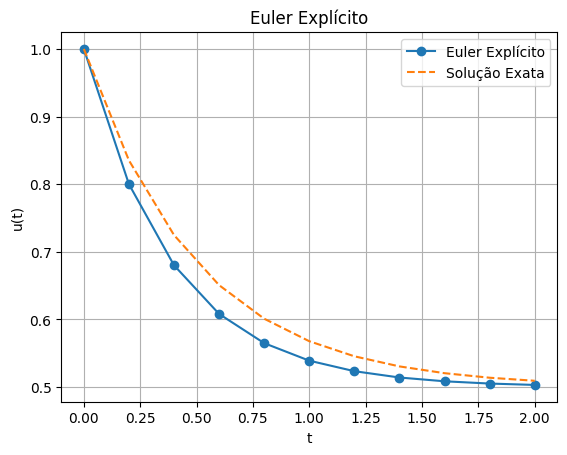

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Método de Euler Explícito (1ª ordem)
def euler_explicito(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        u.append(u[-1] + h * f(t[-1], u[-1]))
        t.append(t[-1] + h)
    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1 (solução exata: u(t) = 0.5 + 0.5*e^{-2t}); u(0) =1
def f(t, u): return -2*u + 1

t, u = euler_explicito(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='Euler Explícito')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')       # Eixo X: tempo
plt.ylabel('u(t)')    # Eixo Y: valor de u
plt.legend(); plt.grid(); plt.title('Euler Explícito'); plt.show()

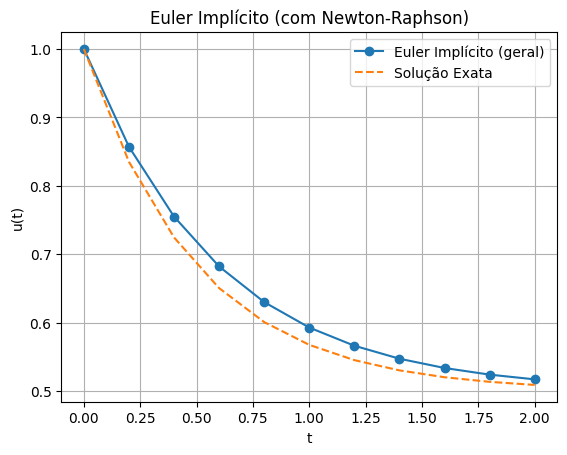

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Método de Euler Implícito (geral) com Newton-Raphson (1ª ordem)
def euler_implicito(f, df_du, t0, u0, h, N, tol=1e-10, max_iter=20):
    t = [t0]
    u = [u0]
    for i in range(N):
        t_i = t[-1] + h

        # Inicialização para Newton-Raphson: chute inicial como u_{i-1}
        u_guess = u[-1]
        for _ in range(max_iter):
            # Função g(u_i) = u_i - u_{i-1} - h * f(t_i, u_i)
            g = u_guess - u[-1] - h * f(t_i, u_guess)
            dg = 1 - h * df_du(t_i, u_guess)
            delta = -g / dg
            u_guess += delta
            if abs(delta) < tol:
                break

        u.append(u_guess)
        t.append(t_i)

    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1
def f(t, u): return -2*u + 1
def df_du(t, u): return -2  # derivada de f em relação a u

t, u = euler_implicito(f, df_du, t0=0, u0=1, h=0.2, N=10)

# Plotagem
plt.plot(t, u, 'o-', label='Euler Implícito (geral)')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()
plt.title('Euler Implícito (com Newton-Raphson)')
plt.show()


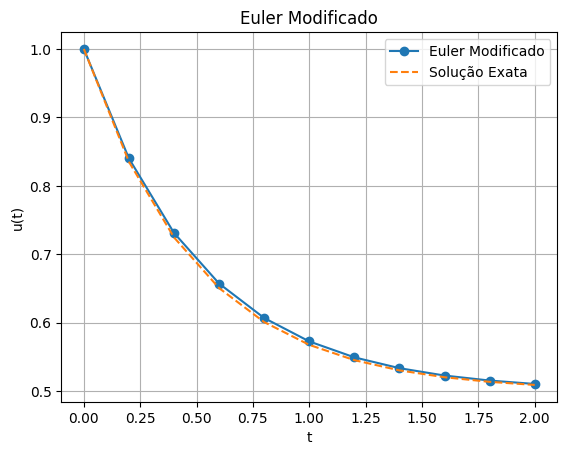

In [5]:
# Método de Euler Modificado (2ª ordem)
def euler_modificado(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        g1 = h*f(t[-1], u[-1])
        g2 = h*f(t[-1]+h/2, u[-1]+g1/2)
        u_next = u[-1] + g2
        u.append(u_next)
        t.append(t[-1] + h)
    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1; u(0) =1
t, u = euler_modificado(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='Euler Modificado')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')       # Eixo X: tempo
plt.ylabel('u(t)')    # Eixo Y: valor de u
plt.legend()
plt.grid()
plt.title('Euler Modificado')
plt.show()

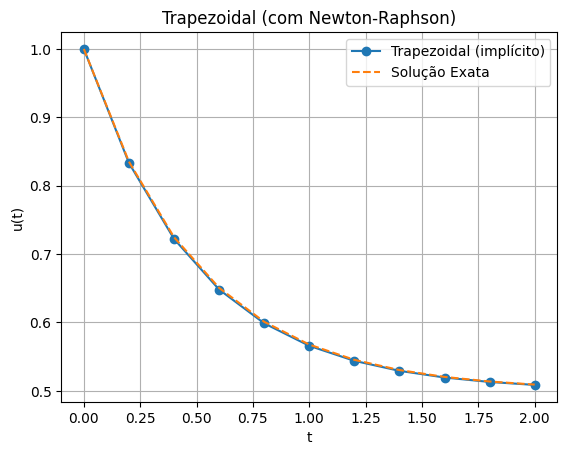

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Método Trapezoidal Implícito (geral) com Newton-Raphson (2ª ordem)
def trapezoidal(f, df_du, t0, u0, h, N, tol=1e-10, max_iter=20):
    t = [t0]
    u = [u0]
    for i in range(N):
        t_prev = t[-1]
        u_prev = u[-1]
        t_i = t_prev + h

        # Inicialização com estimativa do Euler explícito como chute inicial
        # (poderíamos usar u_{i-1} como chute inicial, como no caso anterior,
        # mas usar o Euler exp dá uma melhor estimativa do chute inicial, e ajuda a convergir o Newton-Raphson mais rapidamente)
        u_guess = u_prev + h * f(t_prev, u_prev)

        for _ in range(max_iter):
            # Função g(u_i) = u_i - u_{i-1} - (h/2)[f(t_{i-1}, u_{i-1}) + f(t_i, u_i)]
            f_prev = f(t_prev, u_prev)
            f_curr = f(t_i, u_guess)
            g = u_guess - u_prev - (h/2) * (f_prev + f_curr)
            dg = 1 - (h/2) * df_du(t_i, u_guess)
            delta = -g / dg
            u_guess += delta
            if abs(delta) < tol:
                break

        u.append(u_guess)
        t.append(t_i)

    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1
def f(t, u): return -2*u + 1
def df_du(t, u): return -2

t, u = trapezoidal(f, df_du, t0=0, u0=1, h=0.2, N=10)

# Plotagem
plt.plot(t, u, 'o-', label='Trapezoidal (implícito)')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')       # Eixo X: tempo
plt.ylabel('u(t)')    # Eixo Y: valor de u
plt.legend()
plt.grid()
plt.title('Trapezoidal (com Newton-Raphson)')
plt.show()


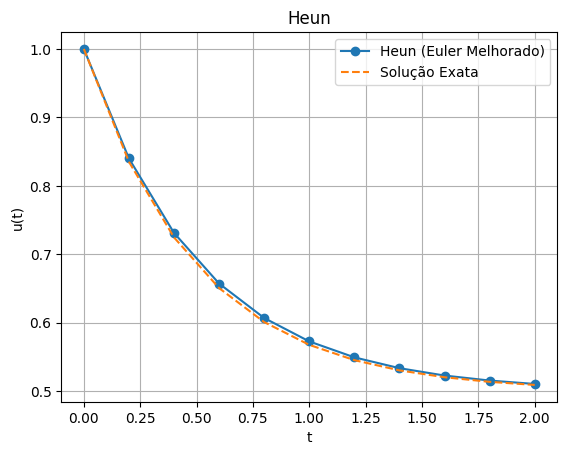

In [6]:
# Método de Heun (Euler Melhorado) (2ª ordem)
def heun(f, t0, u0, h, N):
    t = [t0]
    u = [u0]
    for i in range(N):
        f0 = f(t[-1], u[-1])                      # Passo 1: avalia f no ponto atual
        upred = u[-1] + h * f0                     # Passo 2: predição (Euler explícito)
        f1 = f(t[-1] + h, upred)                   # Passo 3: avalia f no ponto previsto
        u_next = u[-1] + (h/2) * (f0 + f1)         # Passo 4: correção com média das derivadas
        u.append(u_next)
        t.append(t[-1] + h)
    return np.array(t), np.array(u)

# Exemplo: du/dt = -2u + 1; u(0) =1
t, u = heun(f, t0=0, u0=1, h=0.2, N=10)

plt.plot(t, u, 'o-', label='Heun (Euler Melhorado)')
plt.plot(t, 0.5 + 0.5*np.exp(-2*t), '--', label='Solução Exata')
plt.xlabel('t')       # Eixo X: tempo
plt.ylabel('u(t)')    # Eixo Y: valor de u
plt.legend()
plt.grid()
plt.title('Heun')
plt.show()